In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

Reading the file from my Google Drive


In [ ]:
dataFrame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nfr.txt',delimiter='/n',header=None,names=['Requirment'])

<ipython-input-2-b7c985f473f7>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dataFrame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nfr.txt',delimiter='/n',header=None,names=['Requirment'])


In [ ]:
dataFrame.head()

,Requirment
0,PE:The system shall refresh the display every ...
1,LF:The application shall match the color of th...
2,US: If projected the data must be readable. ...
3,A: The product shall be available during norma...
4,US: If projected the data must be understanda...


In [ ]:
!python --version


Python 3.10.12


Spliting text into two columns Type and Description

In [ ]:
dataFrame[['Type', 'Description']] = dataFrame['Requirment'].str.split(':', 1, expand=True)


<ipython-input-5-cc75d2f32d5e>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  dataFrame[['Type', 'Description']] = dataFrame['Requirment'].str.split(':', 1, expand=True)


In [ ]:
dataFrame.head()

,Requirment,Type,Description
0,PE:The system shall refresh the display every ...,PE,The system shall refresh the display every 60 ...
1,LF:The application shall match the color of th...,LF,The application shall match the color of the s...
2,US: If projected the data must be readable. ...,US,If projected the data must be readable. On ...
3,A: The product shall be available during norma...,A,The product shall be available during normal ...
4,US: If projected the data must be understanda...,US,If projected the data must be understandable...


In [ ]:
data=dataFrame.drop('Requirment',axis=1)

Applying Label Encoding

In [ ]:
encoder = LabelEncoder()
encoder.fit(data['Type'])

data['Type'] = encoder.transform(dataFrame['Type'])

data.head(10)





,Type,Description
0,7,The system shall refresh the display every 60 ...
1,4,The application shall match the color of the s...
2,11,If projected the data must be readable. On ...
3,0,The product shall be available during normal ...
4,11,If projected the data must be understandable...
5,10,The product shall ensure that it can only be a...
6,11,The product shall be intuitive and self-explan...
7,7,The product shall respond fast to keep up-to-d...
8,1,The system shall have a MDI form that allows f...
9,1,The system shall display Events in a vertical ...


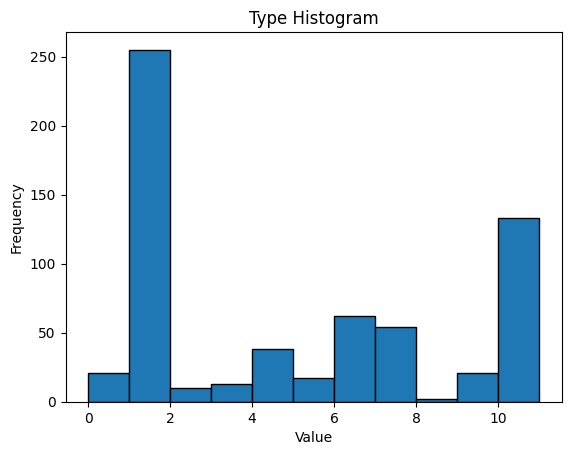

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data['Type'], bins=11, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Type Histogram')
plt.show()


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens]
    tokens = [token for token in tokens if token not in string.punctuation]
    tokens = [token for token in tokens if not token.isdigit() and token.isalpha()]
    tokens = [token for token in tokens if token not in stopwords]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

data['Description_postprocess'] = data['Description'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data.head()

,Type,Description,Description_postprocess
0,7,The system shall refresh the display every 60 ...,"[system, shall, refresh, display, every, second]"
1,4,The application shall match the color of the s...,"[application, shall, match, color, schema, set..."
2,11,If projected the data must be readable. On ...,"[projected, data, must, readable, projection, ..."
3,0,The product shall be available during normal ...,"[product, shall, available, normal, business, ..."
4,11,If projected the data must be understandable...,"[projected, data, must, understandable, projec..."


In [ ]:
!pip install --upgrade gensim numpy smart_open
!pip install pycountry


  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)
  Attempting uninstall: smart_open
    Found existing installation: smart-open 4.1.2
    Uninstalling smart-open-4.1.2:
      Successfully uninstalled smart-open-4.1.2


In [ ]:
!pip install gensim

In [ ]:
import pycountry
import gensim
from gensim.models import Word2Vec
import numpy as np

# Create Word2Vec model
model = gensim.models.Word2Vec(window=10, workers=4, min_count=1)
model.build_vocab(data['Description_postprocess'], progress_per=15)

# Get alpha-3 code for the English language
english_language = pycountry.languages.get(alpha_2='en')
if english_language is not None:
    alpha_3_code = english_language.alpha_3
    print(alpha_3_code)
else:
    print("English language not found in pycountry.languages")

def compute_average_vector(tokens, model):
    # Initialize an empty vector
    average_vector = np.zeros(model.vector_size)

    # Count the number of valid tokens
    num_tokens = 0

    # Compute the sum of token vectors
    for token in tokens:
        if token in model.wv.key_to_index:
            average_vector += model.wv[token]
            num_tokens += 1

    # Compute the average by dividing the sum by the number of tokens
    if num_tokens > 0:
        average_vector /= num_tokens

    return average_vector

data['Description_vectors'] = data['Description_postprocess'].apply(lambda x: compute_average_vector(x, model))


eng


In [ ]:
data.drop(['Description_postprocess','Description'],axis=1)

,Type,Description_vectors
0,7,"[0.00020717331305301437, 0.0007319031647057272..."
1,4,"[-0.0008271803962998092, -0.000990694524080026..."
2,11,"[-0.002669368009082973, 0.003963698819279671, ..."
3,0,"[0.0012960966705577448, -0.000640087567767801,..."
4,11,"[-0.002111893695066957, 0.004649106899331159, ..."
...,...,...
621,10,"[0.0019051375028748924, 0.0023550355007710797,..."
622,10,"[-0.00030781529130763374, 0.000933007395360618..."
623,3,"[-0.0008896601852029562, -0.002375425980426371..."
624,3,"[0.00046771198103670033, -0.001866542336938437..."


In [ ]:
data.head()

,Type,Description,Description_postprocess,Description_vectors
0,7,The system shall refresh the display every 60 ...,"[system, shall, refresh, display, every, second]","[0.00020717331305301437, 0.0007319031647057272..."
1,4,The application shall match the color of the s...,"[application, shall, match, color, schema, set...","[-0.0008271803962998092, -0.000990694524080026..."
2,11,If projected the data must be readable. On ...,"[projected, data, must, readable, projection, ...","[-0.002669368009082973, 0.003963698819279671, ..."
3,0,The product shall be available during normal ...,"[product, shall, available, normal, business, ...","[0.0012960966705577448, -0.000640087567767801,..."
4,11,If projected the data must be understandable...,"[projected, data, must, understandable, projec...","[-0.002111893695066957, 0.004649106899331159, ..."


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(data['Description_vectors'], data['Type'], test_size=0.2, random_state=42)
svm = SVC()
X_train = np.array(X_train.tolist())
X_train = X_train.reshape(-1, model.vector_size)
X_test = np.array(X_test.tolist())
X_test = X_test.reshape(-1, model.vector_size)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.51      1.00      0.68        52
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.71      0.56      0.63         9
           7       1.00      0.30      0.46        20
           9       0.00      0.00      0.00         4
          10       1.00      0.33      0.50        12
          11       0.67      0.29      0.40        14

    accuracy                           0.58       126
   macro avg       0.45      0.27      0.30       126
weighted avg       0.62      0.58      0.51       126



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


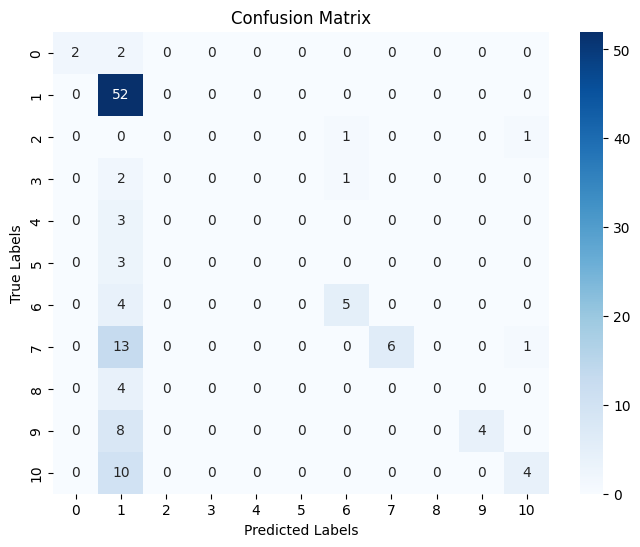

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()
